In [104]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [71]:
cwd = os.getcwd()
files = os.listdir(cwd) 

In [88]:
df=pd.read_excel('data123.xlsx')
df_total = pd.DataFrame()
for file in files:  # loop through Excel files
    if file.endswith('.xlsx'):
        excel_file = pd.ExcelFile(file)
        sheets = excel_file.sheet_names
        for sheet in sheets: # loop through sheets inside an Excel file
            df = excel_file.parse(sheet_name = sheet)
            df_total = df_total.append(df)
df_total.to_excel('Superstore.xlsx')


/var/folders/1k/qxj7t9890x9_tkxj_62661f00000gn/T/ipykernel_41863/1562643575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df)
/var/folders/1k/qxj7t9890x9_tkxj_62661f00000gn/T/ipykernel_41863/1562643575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df)
/var/folders/1k/qxj7t9890x9_tkxj_62661f00000gn/T/ipykernel_41863/1562643575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df)
/var/folders/1k/qxj7t9890x9_tkxj_62661f00000gn/T/ipykernel_41863/1562643575.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total = df_total.append(df)
/var/fol

In [91]:
#Viewing stastical distribuition
df_total.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,19988.000000,19977.000000,19988.000000,19988.000000,19988.000000,19988.000000
mean,9994.500000,55217.791260,229.858001,3.789574,0.156203,28.656896
std,5770.182926,32050.423446,623.229509,2.225054,0.206447,234.254247
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,4997.750000,23223.000000,17.280000,2.000000,0.000000,1.728000
50%,9994.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,14991.250000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,19988.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [74]:
df_total.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Person',
       'Returned'],
      dtype='object')

In [90]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20792 entries, 0 to 799
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         19988 non-null  float64       
 1   Order ID       20788 non-null  object        
 2   Order Date     19988 non-null  datetime64[ns]
 3   Ship Date      19988 non-null  datetime64[ns]
 4   Ship Mode      19988 non-null  object        
 5   Customer ID    19988 non-null  object        
 6   Customer Name  19988 non-null  object        
 7   Segment        19988 non-null  object        
 8   Country        19988 non-null  object        
 9   City           19988 non-null  object        
 10  State          19988 non-null  object        
 11  Postal Code    19977 non-null  float64       
 12  Region         19992 non-null  object        
 13  Product ID     19988 non-null  object        
 14  Category       19988 non-null  object        
 15  Sub-Category   19988 

In [78]:
#Viewing the unique categories in the dataset.
print(df_total['Category'].unique())

['Office Supplies' 'Furniture' 'Technology' nan]


In [79]:
#Viewing the states in the dataset.
print(df_total['State'].unique())

['California' 'Oregon' 'Arizona' 'Nevada' 'Washington' 'Colorado' 'Utah'
 'New Mexico' 'Idaho' 'Montana' 'Wyoming' 'Texas' 'Illinois' 'Michigan'
 'Indiana' 'South Dakota' 'Wisconsin' 'Missouri' 'Minnesota' 'Iowa'
 'Oklahoma' 'Nebraska' 'Kansas' 'North Dakota' 'Pennsylvania' 'Delaware'
 'Ohio' 'New York' 'New Jersey' 'Massachusetts' 'Maryland' 'Connecticut'
 'New Hampshire' 'Maine' 'Rhode Island' 'District of Columbia' 'Vermont'
 'West Virginia' 'Georgia' 'Kentucky' 'Virginia' 'Louisiana'
 'South Carolina' 'Arkansas' 'Tennessee' 'Florida' 'North Carolina'
 'Mississippi' 'Alabama' nan]


In [80]:
#viewing the number of unique entries in the column
Numberof_states=df_total['State'].nunique()
print("There are %d states in this df."%Numberof_states)

There are 49 states in this df.


In [81]:
print(df_total['Sub-Category'].unique())

['Paper' 'Storage' 'Bookcases' 'Art' 'Appliances' 'Binders' 'Envelopes'
 'Furnishings' 'Tables' 'Fasteners' 'Chairs' 'Accessories' 'Supplies'
 'Machines' 'Phones' 'Labels' 'Copiers' nan]


In [82]:
Numberof_subcategory=df_total['Sub-Category'].nunique()
print("Categories are divided into %d subcategories"%Numberof_subcategory)

Categories are divided into 17 subcategories


In [83]:
df_total['Segment'].value_counts()

Consumer       10382
Corporate       6040
Home Office     3566
Name: Segment, dtype: int64

In [84]:
#To view Loss

loss_df=df_total[df_total['Profit'] < 0] #Reading the loss

In [85]:
loss_df #Printing the loss

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Person,Returned
5,13588.0,CA-2011-146591,2013-01-19,2013-01-20,First Class,TS-21340,Toby Swindell,Consumer,United States,Scottsdale,...,OFF-BI-10003676,Office Supplies,Binders,"GBC Standard Recycled Report Covers, Clear Pla...",32.340,10.0,0.7,-23.7160,NaN,NaN
8,13591.0,CA-2011-146591,2013-01-19,2013-01-20,First Class,TS-21340,Toby Swindell,Consumer,United States,Scottsdale,...,FUR-BO-10001972,Furniture,Bookcases,O'Sullivan 4-Shelf Bookcase in Odessa Pine,181.470,5.0,0.7,-320.5970,NaN,NaN
13,13596.0,US-2011-117163,2013-01-27,2013-02-02,Standard Class,EJ-13720,Ed Jacobs,Consumer,United States,San Diego,...,FUR-TA-10003469,Furniture,Tables,Balt Split Level Computer Training Table,333.000,3.0,0.2,-16.6500,NaN,NaN
23,13606.0,US-2011-110674,2013-02-12,2013-02-18,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Concord,...,FUR-CH-10000225,Furniture,Chairs,"Global Geo Office Task Chair, Gray",129.568,2.0,0.2,-24.2940,NaN,NaN
33,13616.0,CA-2011-105648,2013-03-03,2013-03-07,Standard Class,EJ-14155,Eva Jacobs,Consumer,United States,San Diego,...,FUR-TA-10002958,Furniture,Tables,"Bevis Oval Conference Table, Walnut",626.352,3.0,0.2,-23.4882,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,13533.0,CA-2015-130428,2015-03-31,2015-03-31,Same Day,TG-21640,Trudy Glocke,Consumer,United States,Tampa,...,OFF-BI-10001636,Office Supplies,Binders,Ibico Plastic and Wire Spiral Binding Combs,12.645,5.0,0.7,-10.1160,NaN,NaN
3197,13540.0,CA-2016-116638,2016-01-28,2016-01-31,Second Class,JH-15985,Joseph Holt,Consumer,United States,Concord,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13.0,0.4,-1862.3124,NaN,NaN
3219,13562.0,CA-2017-136322,2017-10-21,2017-10-26,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Fort Lauderdale,...,OFF-BI-10004817,Office Supplies,Binders,GBC Personal VeloBind Strips,28.752,8.0,0.7,-21.0848,NaN,NaN
3222,13565.0,CA-2016-162201,2016-06-08,2016-06-12,Standard Class,AG-10495,Andrew Gjertsen,Corporate,United States,Saint Petersburg,...,OFF-ST-10000046,Office Supplies,Storage,Fellowes Super Stor/Drawer Files,516.960,4.0,0.2,-6.4620,NaN,NaN


In [86]:
loss_df.shape

(3742, 23)

In [87]:
#Veiwing statistical description
loss_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000,3742.000000
mean,7652.609834,55991.122929,250.511574,3.762694,0.480887,-83.448042
std,5499.945025,26038.021213,714.971718,2.141061,0.235049,284.385405
min,3.000000,1841.000000,0.444000,1.000000,0.100000,-6599.978000
25%,2969.750000,33024.000000,12.482500,2.000000,0.200000,-58.674075
50%,6627.500000,60623.000000,71.088000,3.000000,0.400000,-18.088200
75%,11730.500000,77095.000000,285.201000,5.000000,0.700000,-6.249250
max,19967.000000,98198.000000,22638.480000,14.000000,0.800000,-0.089500


In [92]:
Total_Loss=np.negative(loss_df['Profit'].sum())
print("Total loss = %.2f" %Total_Loss)

Total loss = 312262.57


In [94]:
loss_df.groupby(by='Segment').sum()
#We can see that giving more discounts leads to more loss, For making profit lower the discount

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,,
Consumer,14954874.0,114404520.0,494392.4920,7302.0,953.52,-169891.4224
Corporate,8832229.0,60068546.0,263721.0766,4382.0,544.00,-89574.4152
Home Office,4848963.0,35045716.0,179300.7410,2396.0,301.96,-52796.7338


In [95]:
loss_df.groupby(by='Sub-Category').sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,,
Accessories,1501583.0,10572764.0,21917.6000,660.0,36.40,-1861.2530
Appliances,317384.0,9651742.0,6765.0680,470.0,107.20,-17259.2824
Binders,9385653.0,65218600.0,72281.2260,4912.0,904.80,-77020.9928
Bookcases,1931621.0,12847012.0,96145.4816,844.0,75.98,-24304.4120
Chairs,3966962.0,30016050.0,183976.9120,1752.0,122.80,-19761.6826
Fasteners,218343.0,1403860.0,298.5600,110.0,4.80,-66.3904
Furnishings,1275016.0,21941826.0,25691.6880,1194.0,177.20,-12981.8268
Machines,816411.0,4472522.0,144912.5060,314.0,51.20,-60237.3364
Phones,2554550.0,12210588.0,71595.6800,952.0,93.20,-15061.2470


–> There is more loss in the Binders category, Machines category, and tables category when compared to other categories.
-> Looking closely, Binders sale is adequate so we should lower its discount rates 
-> More discount should be given to products whose sale is less



In [96]:
loss_df['Sub-Category'].value_counts()

Binders        1226
Chairs          470
Tables          406
Furnishings     334
Storage         322
Phones          272
Bookcases       218
Accessories     182
Appliances      134
Machines         88
Supplies         66
Fasteners        24
Name: Sub-Category, dtype: int64

# Viewing top 10 cities where loss is the most

In [97]:
loss_df.groupby(by='City').sum().sort_values('Profit',ascending=True).head(10)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,,
Philadelphia,3735831.0,9567426.0,140921.1020,1784.0,230.60,-39181.4822
Houston,864273.0,28512948.0,75281.4608,1366.0,208.28,-29570.7336
Chicago,719744.0,18794984.0,39820.0240,1082.0,176.40,-22241.2542
San Antonio,137470.0,5161662.0,34790.2900,278.0,34.20,-15662.0508
Lancaster,317245.0,1367808.0,15398.4840,142.0,18.80,-15264.9892
Burlington,97446.0,217736.0,24089.7480,38.0,4.00,-11998.6636
Dallas,358670.0,10975588.0,19988.1124,560.0,78.60,-8417.0436
Jacksonville,955318.0,2474352.0,62292.5420,308.0,37.70,-8119.9714
New York City,596876.0,801656.0,39067.6040,264.0,24.40,-7932.0452


# Taking a look at the category with least profit

In [100]:
loss_df.sort_values(['Sales'],ascending=True).groupby(by='Category').mean()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,,
Furniture,7597.894958,59700.907563,361.184295,3.714286,0.367143,-85.344690
Office Supplies,7287.656885,54746.056433,103.395796,3.865688,0.617607,-63.899840
Technology,8989.933579,50287.590406,439.899974,3.553506,0.333579,-142.361322


# Seeing States where sales are less

In [99]:
df_total.groupby(['State']).sum()['Sales'].nsmallest(10)

State
North Dakota            1839.820
West Virginia           2419.648
Maine                   2541.060
South Dakota            2631.120
Wyoming                 3206.272
District of Columbia    5730.040
Kansas                  5828.620
Idaho                   8764.972
Iowa                    9159.520
New Mexico              9567.044
Name: Sales, dtype: float64

In [101]:
df_total.sort_values(['Segment'],ascending=True).groupby('Segment').sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,,
Consumer,103597710.0,577730178.0,2.322803e+06,39042.0,1641.82,268238.4184
Corporate,60845213.0,329045620.0,1.412293e+06,23216.0,955.70,183958.2680
Home Office,35327143.0,196310018.0,8.593063e+05,13488.0,524.66,120597.3570


-> The corporate segmant sales are less and the profit is highest in consumer segment. So we should think of tactics to target the Corporate sector. 
-> We should also consider lowering the discount in the Home Office sector as sales are highest and profit is lowest

In [102]:
df_total.groupby(by='Region').sum()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,,
Central,10794981.0,303572300.0,1.002480e+06,17560.0,1116.68,79412.7250
East,42688672.0,100283908.0,1.357562e+06,21236.0,828.00,183045.5600
South,38758500.0,111750104.0,7.834438e+05,12418.0,477.10,93498.8606
West,107527913.0,587479504.0,1.450916e+06,24532.0,700.40,216836.8978


-> We can see that sales are less in central region.
-> With highest discount and least profit.
-> We should think of tactics like advertisements and gift vouchers to deal with this problem.


# Visualizing the data

In [105]:
plt.rcParams['figure.figsize']=(15,3)

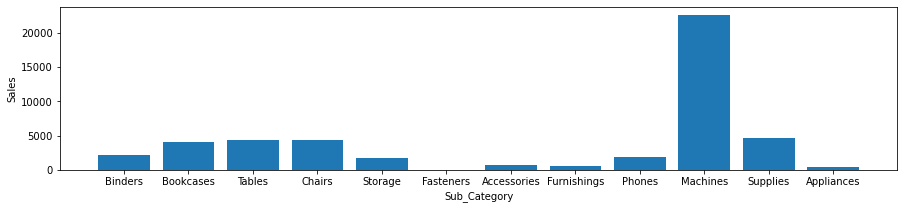

In [106]:
plt.bar(loss_df['Sub-Category'],loss_df['Sales']);
plt.rcParams.update({'font.size':10});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

-> We can see that sales for Fasteners, Appliances, Furnishings and Accessories is very low.

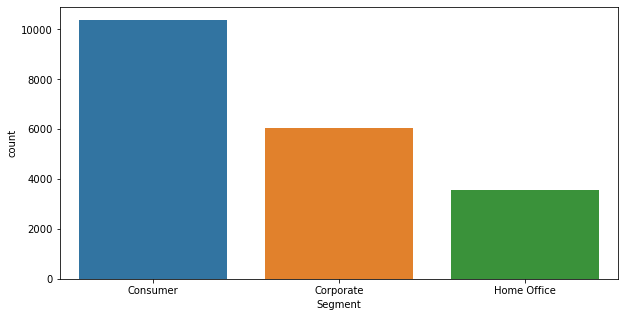

In [112]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(x=df_total.Segment)
plt.show();

-> The count is least in Home Office. Improvement is required in this segment

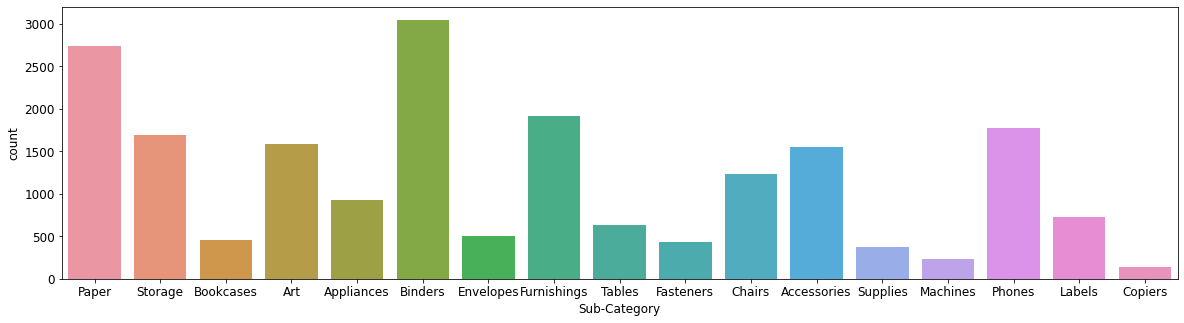

In [114]:
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Sub-Category',data=df_total)
plt.show()

-> Improvement is required in machines and copiers subcategory


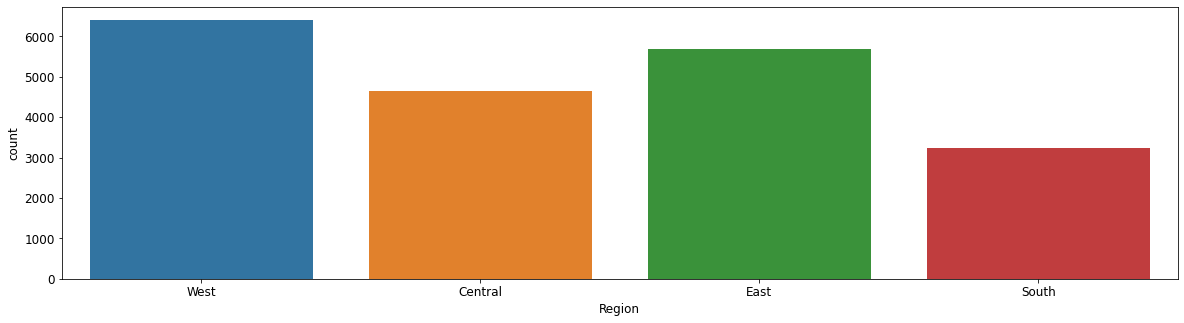

In [115]:
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size':12})
sns.countplot(x='Region',data=df_total)
plt.show()

-> South is lacking behind somewhere compared to other regions.


In [116]:
df_total.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.441651,0.004002,0.012504,-0.207472,0.023115
Postal Code,0.441651,1.000000,-0.023102,0.013068,0.057844,-0.029357
Sales,0.004002,-0.023102,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012504,0.013068,0.200795,1.000000,0.008623,0.066253
Discount,-0.207472,0.057844,-0.028190,0.008623,1.000000,-0.219487
Profit,0.023115,-0.029357,0.479064,0.066253,-0.219487,1.000000


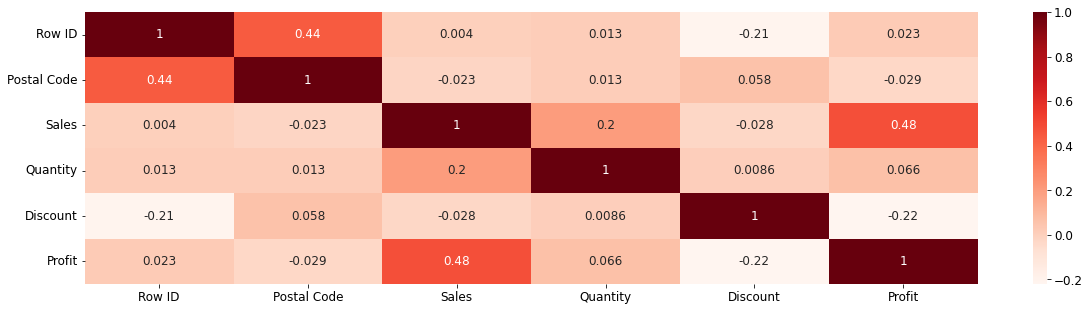

In [117]:
sns.heatmap(df_total.corr(),cmap='Reds',annot=True);
plt.rcParams['figure.figsize']=(10,5)

# Heat map


In [ ]:
-> There is a moderate corelation between sales and profit.
-> A negative corelation between discount and profit.

# Conclusion

In [ ]:
-> More discount leads to more loss.
-> There is improvement required in the Home office sector.
-> Cities with fewer sales should be targeted more often.
-> Instead of discounts we should consider, gift vouchers and advertisements.